# Using the model server to do an inference using REST
Based on [YOLOv5 Model Serving on RHODS](https://github.com/rh-aiservices-bu/yolov5-model-serving.git)

## First, make sure we have the libraries we need
Have a look at requirements.txt to see which libraries are used. You can ignore compatibility errors if any when doing the import.

In [1]:
!pip install -qr requirements.txt


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: pip install --upgrade pip


## Unpack the image data

In [2]:
# Unzip the images and annoations
!mkdir -p yolov5/data/manuela
!unzip  -q -o  data.zip -d yolov5/data/manuela
!ls -l yolov5/data/manuela/data/*

total 20
-rw-r--r--. 1 1001060000 1001060000  137 Apr 21 09:54 data.yaml
-rw-r--r--. 1 1001060000 1001060000  659 Apr  7 12:17 README.txt
drwxr-sr-x. 4 1001060000 1001060000 4096 Apr  7 12:13 test
drwxr-sr-x. 4 1001060000 1001060000 4096 Apr  7 12:13 train
drwxr-sr-x. 4 1001060000 1001060000 4096 Apr  7 12:13 valid


## Import the libraries and module where we have all helper code for doing the inference

In [3]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image

from remote_infer_rest import ort_v5

## Enter the inference URL, the model name, the YAML file with your classes

In [4]:
infer_url = 'https://manuela-vi-onnx-manuela-visual-inspection.apps.ocp5.stormshift.coe.muc.redhat.com/v2/models/manuela-vi-onnx/infer'
# Example with an external route: infer_url = 'https://yolo-project-name.apps.rhods-internal.61tk.p1.openshiftapps.com/v2/models/yolo/infer'

classes_file = 'data.yaml'

## Now set the parameters for the inference

In [5]:
# 1. The image you want to analyze
image_path='yolov5/data/manuela/data/metal-nut-data/valid/images/bent-018.png' # You can replace this with an image you upload
#image_path='images/bus.jpg' 

# 2. Confidence threshold, between 0 and 1 (detections with less score won't be retained)
conf = 0.2

# 3. Intersection over Union Threshold, between 0 and 1 (cleanup overlapping boxes)
iou = 0.4

## Launch the inference and show the result

yolov5/data/manuela/data/metal-nut-data/valid/images/bent-018.png processed in 3.16 seconds, inference time 3.04 seconds
Predictions:
tensor([[124.6355,  35.3990, 279.4084, 182.5567,   0.5742,   1.0000]],
       dtype=torch.float64)
Format: each detection is a float64 array shaped as [top_left_corner_x, top_left_corner_y, bottom_right_corner_x, bottom_right_corner_y, confidence, class_index]
The coordinates are relative to a letterboxed representation of the image of size 640x640


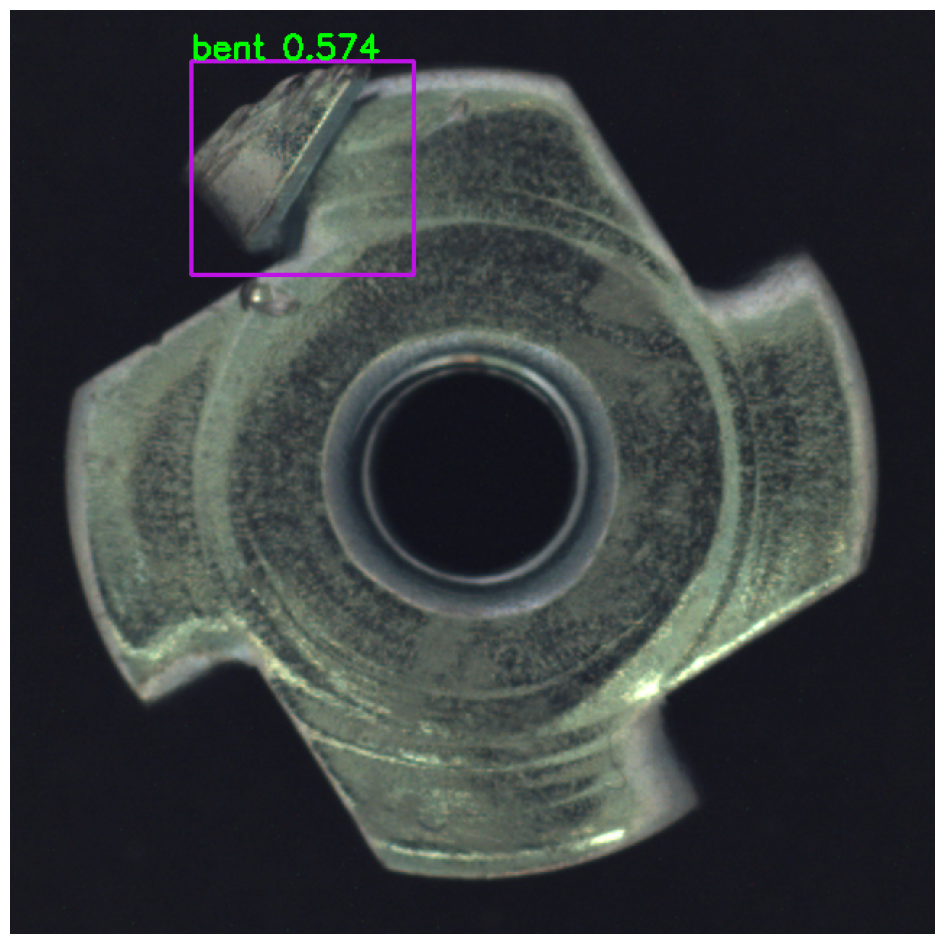

In [6]:
infer=ort_v5(image_path, infer_url, conf, iou, 640, classes_file)
img, out, result = infer()
print(f'{result}')
print('Predictions:')
print(out)
print('Format: each detection is a float64 array shaped as [top_left_corner_x, top_left_corner_y, bottom_right_corner_x, bottom_right_corner_y, confidence, class_index]')
print('The coordinates are relative to a letterboxed representation of the image of size 640x640')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.gcf()
fig.set_size_inches(24, 12)
plt.axis('off')
plt.imshow(img);